StatisticalResult(statistic=0.0642365812706494, p_value=0.12254448625672093)


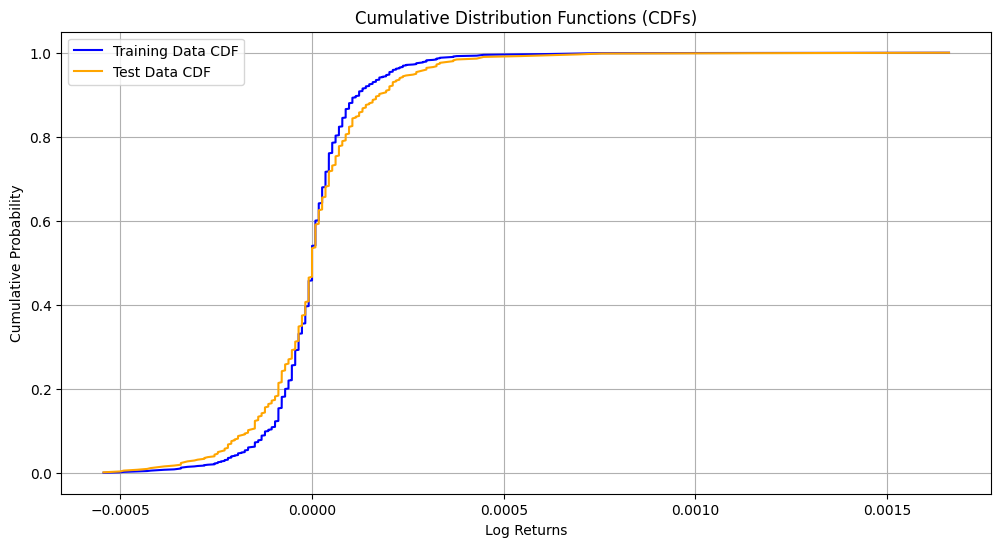

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import seaborn as sns
from scipy.stats import ks_2samp, anderson_ksamp, chi2_contingency, probplot

# Load your EUR/USD historical data
data = pd.read_csv('../../EODHD_EURUSD_HISTORICAL_2019_2024_1min.csv')
data = data['close']
train_data = data[2000:3000]
test_data = data[2000:2500]

# Function to calculate log returns
def calculate_log_returns(prices):
    log_returns = np.log(prices / prices.shift(1))
    return log_returns.dropna()

# Calculate log returns for both datasets
log_returns_train = calculate_log_returns(train_data)
log_returns_test = calculate_log_returns(test_data)

# Detector
from frouros.detectors.data_drift import KSTest
detector = KSTest() 
_=detector.fit(log_returns_train.to_numpy()) 
result, _=detector.compare(log_returns_test.to_numpy())
print(result)



# Visualize the KS test results
plt.figure(figsize=(12, 6))

# Plot CDFs of the training and test data
train_cdf = np.sort(log_returns_train)
test_cdf = np.sort(log_returns_test)
train_cdf_y = np.arange(1, len(train_cdf) + 1) / len(train_cdf)
test_cdf_y = np.arange(1, len(test_cdf) + 1) / len(test_cdf)

plt.plot(train_cdf, train_cdf_y, label='Training Data CDF', color='blue')
plt.plot(test_cdf, test_cdf_y, label='Test Data CDF', color='orange')
plt.title('Cumulative Distribution Functions (CDFs)')
plt.xlabel('Log Returns')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.show()

## version 2 k-s test

StatisticalResult(statistic=0.11234882176765944, p_value=0.0004122233740491723)
Data drift detected


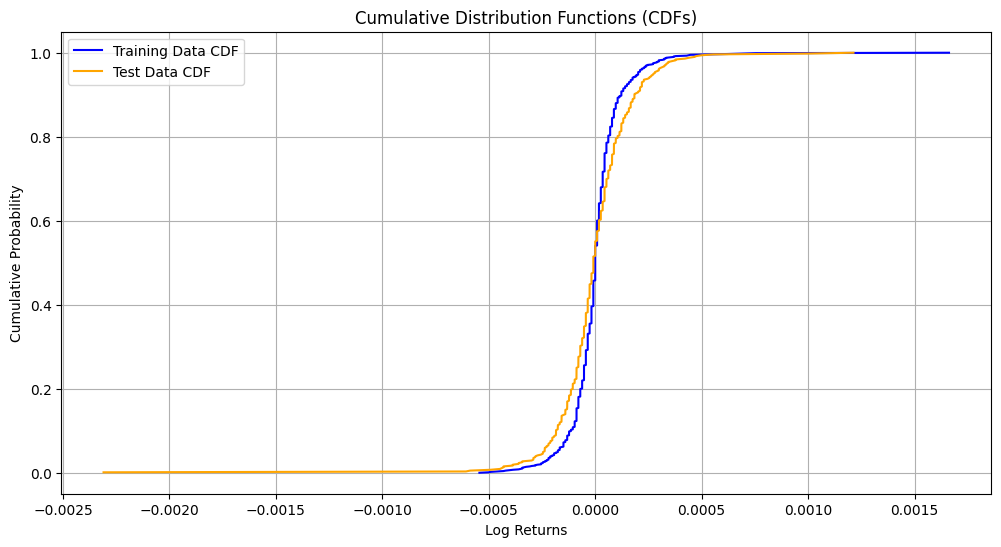

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from frouros.detectors.data_drift import KSTest

# Load your EUR/USD historical data
data = pd.read_csv('../../datasets/FIXED_EODHD_EURUSD_HISTORICAL_2019_2024_1min.csv')
data = data['close']
train_data = data[2000:3000]
test_data = data[3000:3500]

# Function to calculate log returns
def calculate_log_returns(prices):
    log_returns = np.log(prices / prices.shift(1))
    return log_returns.dropna()

# Calculate log returns for both datasets
log_returns_train = calculate_log_returns(train_data)
log_returns_test = calculate_log_returns(test_data)

# Detector
detector = KSTest()
_ = detector.fit(log_returns_train.to_numpy())
result, _ = detector.compare(log_returns_test.to_numpy())
print(result)


# Check if drift is taking place
alpha = 0.005
if result.p_value <= alpha:
    print("Data drift detected")
else:
    print("No data drift detected")

# Visualize the KS test results
plt.figure(figsize=(12, 6))

# Plot CDFs of the training and test data
train_cdf = np.sort(log_returns_train)
test_cdf = np.sort(log_returns_test)
train_cdf_y = np.arange(1, len(train_cdf) + 1) / len(train_cdf)
test_cdf_y = np.arange(1, len(test_cdf) + 1) / len(test_cdf)

plt.plot(train_cdf, train_cdf_y, label='Training Data CDF', color='blue')
plt.plot(test_cdf, test_cdf_y, label='Test Data CDF', color='orange')


plt.title('Cumulative Distribution Functions (CDFs)')
plt.xlabel('Log Returns')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid()
plt.show()